<span style="font-size: 32px;">**Revenue and Risk Insights:**</span>

<span style="font-size: 28px;">Case Study on International Automobile Company</span>

The following case uses a **[Kaggle Data Set](https://www.kaggle.com/datasets/ddosad/auto-sales-data/data)** on a company that manufactures miniature cars, planes, and boats, among other transportation models for souvenirs globally. The research focuses on understanding how the revenue is generated and finding if there are concentration risks in terms of geography, product mix, and customers. Additionally, understand if there are seasonalities to take into consideration. All insights should help the sales teams create a sales strategy that maximizes revenue while keeping a diversified product and customer mix to reduce risks.

# Meta Data

The data contains variables related to purchase orders like price, quantity, total purchase value, products, customer name, country, and city, among others: 

| Column Name           | Description                                                                                       |
|:----------------------|:--------------------------------------------------------------------------------------------------|
| ORDERNUMBER           | This column represents the unique identification number assigned to each order.                   |
| QUANTITYORDERED       | It indicates the number of items ordered in each order.                                           |
| PRICEEACH             | This column specifies the price of each item in the order.                                        |
| ORDERLINENUMBER       | It represents the line number of each item within an order.                                       |
| SALES                 | This column denotes the total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item. |
| ORDERDATE             | Denotes the date on which the order was placed.                                                |
| DAYS_SINCE_LAST_ORDER | This column represents the number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns. |
| STATUS                | It indicates the status of the order, such as "Shipped," "In Process," "Cancelled," "Disputed," "On Hold," or "Resolved." |
| PRODUCTLINE           | This column specifies the product line categories to which each item belongs.                     |
| MSRP                  | Stands for the Manufacturer's Suggested Retail Price and represents the suggested selling price for each item. |
| PRODUCTCODE           | This column represents the unique code assigned to each product.                                   |
| CUSTOMERNAME          | It denotes the name of the customer who placed the order.                                          |
| PHONE                 | This column contains the customer's contact phone number.                                    |
| ADDRESSLINE1          | It represents the first line of the customer's address.                                            |
| CITY                  | This column specifies the city where the customer is located.                                      |
| POSTALCODE            | It denotes the postal code or ZIP code associated with the customer's address.                     |
| COUNTRY               | This column indicates the country where the customer is located.                                   |
| CONTACTLASTNAME       | It represents the last name of the contact person associated with the customer.                    |
| CONTACTFIRSTNAME      | This column denotes the first name of the contact person associated with the customer.             |
| DEALSIZE              | It indicates the size of the deal or order, which are the categories "Small," "Medium," or "Large."|

# Importing Libraries

First, we will load all required libraries for the data cleaning and exploratory data analysis (EDA):

In [76]:
# Import libraries (copy from Syllabus)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt            # Matplotlib.pyplot for data visualization
import matplotlib.ticker as mticker        # Matplotlib.mticker for tick formatting
import plotly.graph_objects as go          # Imported the plotly.graph_objects module using the alias go. The module provides a way to create interactive plots and visualizations in Python
import numpy as np                         # Numpy for numerical computations
import pandas as pd                        # Pandas for data manipulation
import plotly.express as px                # Imported the plotly.express module using the alias px.plotly.express is a high-level interface for creating a variety of visualizations with Plotly, making it easier and quicker to generate plots compared to using plotly.graph_objects directly
import seaborn as sns                      # Seaborn is a statistical data visualization library based on Matplotlib.
from scipy import stats                    # Importing stats from scipy allows you to access a variety of statistical functions and tests provided by the SciPy library

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from datetime import datetime              # allows you to work with date and time objects in Python
from pytz import timezone                  # Importing timezone from the pytz module allows you to work with time zones in Python
from glob import glob                      # Importing glob from the glob module allows you to use the glob function to find all the pathnames matching a specified pattern

np.random.seed(42)                         # To ensure all the probabilistic things are reproducible

# Loading Dataset

The data set is given in a Comma Separated Values (.csv) single file:

In [77]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
autosales_filename = "Auto Sales data.csv"

# Read the CSV files and create backup copies
auto_df_data = pd.read_csv(data_path + autosales_filename)

# Create working copies of the dataframes for analysis
auto_df = auto_df_data.copy()

In [78]:
auto_df.sample(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2678,10235,34,72.55,11,2466.70,02/04/2019,3104,Shipped,Planes,74,S700_4002,"Royal Canadian Collectables, Ltd.",(604) 555-4555,23 Tsawassen Blvd.,Tsawassen,T2F 8M4,Canada,Lincoln,Elizabeth,Small
2713,10339,27,76.31,6,2060.37,23/11/2019,2904,Shipped,Planes,49,S72_1253,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,106-0032,Japan,Shimamura,Akiko,Small
2261,10180,22,114.30,7,2514.60,11/11/2018,2829,Shipped,Motorcycles,102,S32_4485,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
2519,10177,32,76.62,1,2451.84,07/11/2018,3091,Shipped,Ships,72,S700_2610,CAF Imports,+34 913 728 555,"Merchants House, 27-30 Merchant's Quay",Madrid,28023,Spain,Fernandez,Jesus,Small
1561,10110,39,44.35,2,1729.65,18/03/2018,2367,Shipped,Vintage Cars,44,S24_2022,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,Manchester,EC2 5NT,UK,Ashworth,Victoria,Small
1532,10389,49,81.40,2,3988.60,03/03/2020,1622,Shipped,Motorcycles,76,S24_2000,Scandinavian Gift Ideas,0695-34 6555,?kergatan 24,Boras,S-844 67,Sweden,Larsson,Maria,Medium
2093,10291,26,83.79,3,2178.54,08/09/2019,2360,Shipped,Trucks and Buses,96,S32_1268,Scandinavian Gift Ideas,0695-34 6555,?kergatan 24,Boras,S-844 67,Sweden,Larsson,Maria,Small
565,10302,43,170.00,1,7310.00,06/10/2018,1169,Shipped,Vintage Cars,170,S18_1749,"UK Collectables, Ltd.",(171) 555-2282,Berkeley Gardens 12 Brewery,Liverpool,WX1 6LT,UK,Devon,Elizabeth,Large
1793,10227,40,79.62,15,3184.80,02/03/2019,2250,Shipped,Classic Cars,85,S24_3191,"Saveley & Henriot, Co.",78.32.5555,"2, rue du Commerce",Lyon,69004,France,Saveley,Mary,Medium
321,10372,34,174.75,1,5941.50,26/01/2020,448,Shipped,Classic Cars,173,S12_3891,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,106-0032,Japan,Shimamura,Akiko,Medium


In [79]:
print("The dataset contains:",len(auto_df),"records")

The dataset contains: 2747 records


# Data Type Conversions & Formating

Analyze how the variable types were loaded to the data frame:

In [80]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

Some of the variables are in the right format, while others need to be converted from `object` to the correct data type.

## Date Variable

The `ORDERDATE` date variable length seems to be standardized with the same length.

In [81]:
# Let's check the count for each component (including NA values)
auto_df['ORDERDATE'].str.len().value_counts(dropna=False) 

ORDERDATE
10    2747
Name: count, dtype: int64

In [82]:
# The data for the ORDERDATE is clean we not need to replace the values
auto_df['ORDERDATE']=pd.to_datetime(auto_df['ORDERDATE'], dayfirst=True)
print(auto_df['ORDERDATE'].dtype)

datetime64[ns]


## Categorical Variables

The categorical variables do not contain nulls, and the category's names are standardized:

In [83]:
auto_df['STATUS'].value_counts(dropna=False)

STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [84]:
auto_df['PRODUCTLINE'].value_counts(dropna=False)

PRODUCTLINE
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: count, dtype: int64

In [85]:
auto_df['DEALSIZE'].value_counts(dropna=False)

DEALSIZE
Medium    1349
Small     1246
Large      152
Name: count, dtype: int64

Now, a loop for automatically converting all variables to the right data type, trimming extra spaces, and lowercase all value fields is performed:

In [86]:
cat_cols=['STATUS','PRODUCTLINE','DEALSIZE']
str_cols=['PRODUCTCODE','CUSTOMERNAME','CITY','COUNTRY']

In [87]:
for col in cat_cols:
    auto_df[col]=auto_df[col].str.lower()
    auto_df[col]=auto_df[col].str.strip()
    auto_df[col]=auto_df[col].astype('category')  

In [88]:
for col in str_cols:
    auto_df[col]=auto_df[col].str.lower()
    auto_df[col]=auto_df[col].str.strip()
    auto_df[col]=auto_df[col].astype('string') 

In [89]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   category      
 8   PRODUCTLINE           2747 non-null   category      
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   string        
 11  CUSTOMERNAME          2747 non-null   string        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

## Dropping Unnecessary Variables

In [90]:
cols_drop=['POSTALCODE','CONTACTLASTNAME','CONTACTFIRSTNAME','ADDRESSLINE1','PHONE']
auto_df = auto_df.drop(columns=cols_drop)

## Standarizing Column Names

Just for following good practices, all headings are converted to lowercase, and any space is replaced by an underscore:

In [91]:
# Standarizing Column Names
auto_df.columns = auto_df.columns.str.lower().str.replace(' ', '_')

In [92]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ordernumber           2747 non-null   int64         
 1   quantityordered       2747 non-null   int64         
 2   priceeach             2747 non-null   float64       
 3   orderlinenumber       2747 non-null   int64         
 4   sales                 2747 non-null   float64       
 5   orderdate             2747 non-null   datetime64[ns]
 6   days_since_lastorder  2747 non-null   int64         
 7   status                2747 non-null   category      
 8   productline           2747 non-null   category      
 9   msrp                  2747 non-null   int64         
 10  productcode           2747 non-null   string        
 11  customername          2747 non-null   string        
 12  city                  2747 non-null   string        
 13  country           

In [93]:
# Count initial total Data
size_original=len(auto_df)

## Removing Duplicates

In [94]:
# Remove duplicates
auto_df = auto_df.drop_duplicates()
size_duplicates=len(auto_df)
print(size_original-size_duplicates)

0


## Eliminate Empty Records

In [95]:
auto_df = auto_df.dropna(how='all')
size_empty=len(auto_df)
print(size_duplicates-size_empty)

0


# Descriptive Statistics

In [96]:
auto_df.describe()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,days_since_lastorder,msrp
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,100.691664
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2018-11-08 00:00:00,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2019-11-17 00:00:00,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,91.877521,9.762135,42.042549,4.230544,1838.953901,NaN,819.280576,40.114802


In [97]:
auto_df.describe(include=['category'])

,status,productline,dealsize
count,2747,2747,2747
unique,6,7,3
top,shipped,classic cars,medium
freq,2541,949,1349


In [98]:
auto_df.isna().sum()

ordernumber             0
quantityordered         0
priceeach               0
orderlinenumber         0
sales                   0
orderdate               0
days_since_lastorder    0
status                  0
productline             0
msrp                    0
productcode             0
customername            0
city                    0
country                 0
dealsize                0
dtype: int64

# Data Outliers

Histograms were plotted to identify possible outliers. Nonetheless, there is no concrete evidence of outliers:

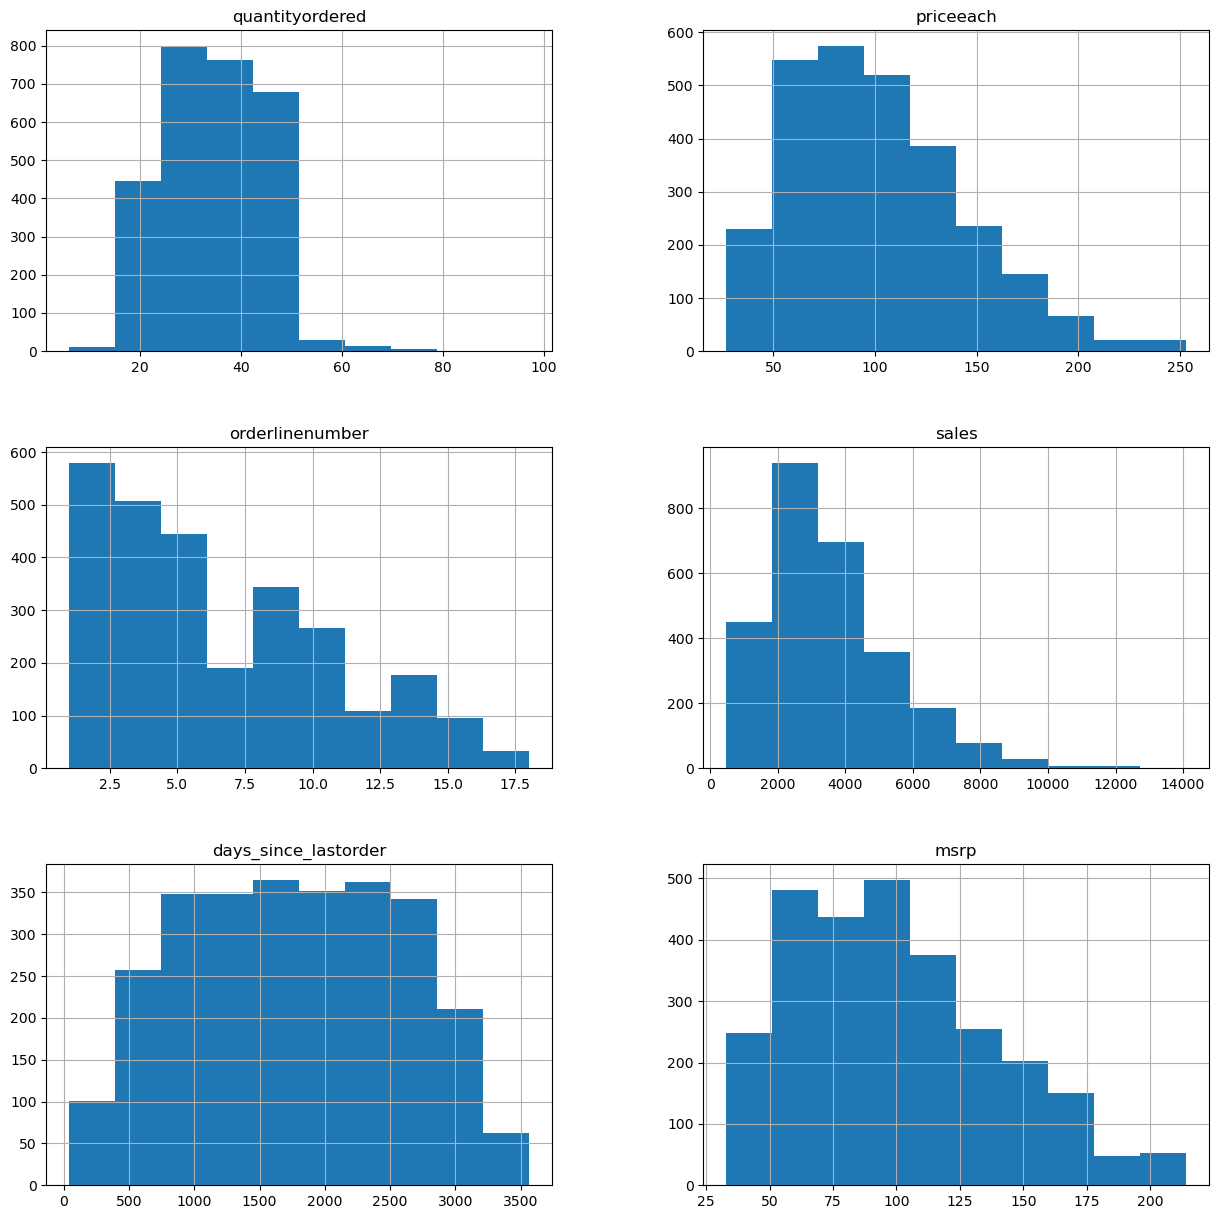

In [99]:
# We use ~ to extract the complement (opposite components)
columns_to_exclude = ['ordernumber', 'orderdate']
auto_hist_df = auto_df.drop(columns=columns_to_exclude)

# Create histograms for the remaining columns in the DataFrame
auto_hist_df.hist(figsize=(15, 15));

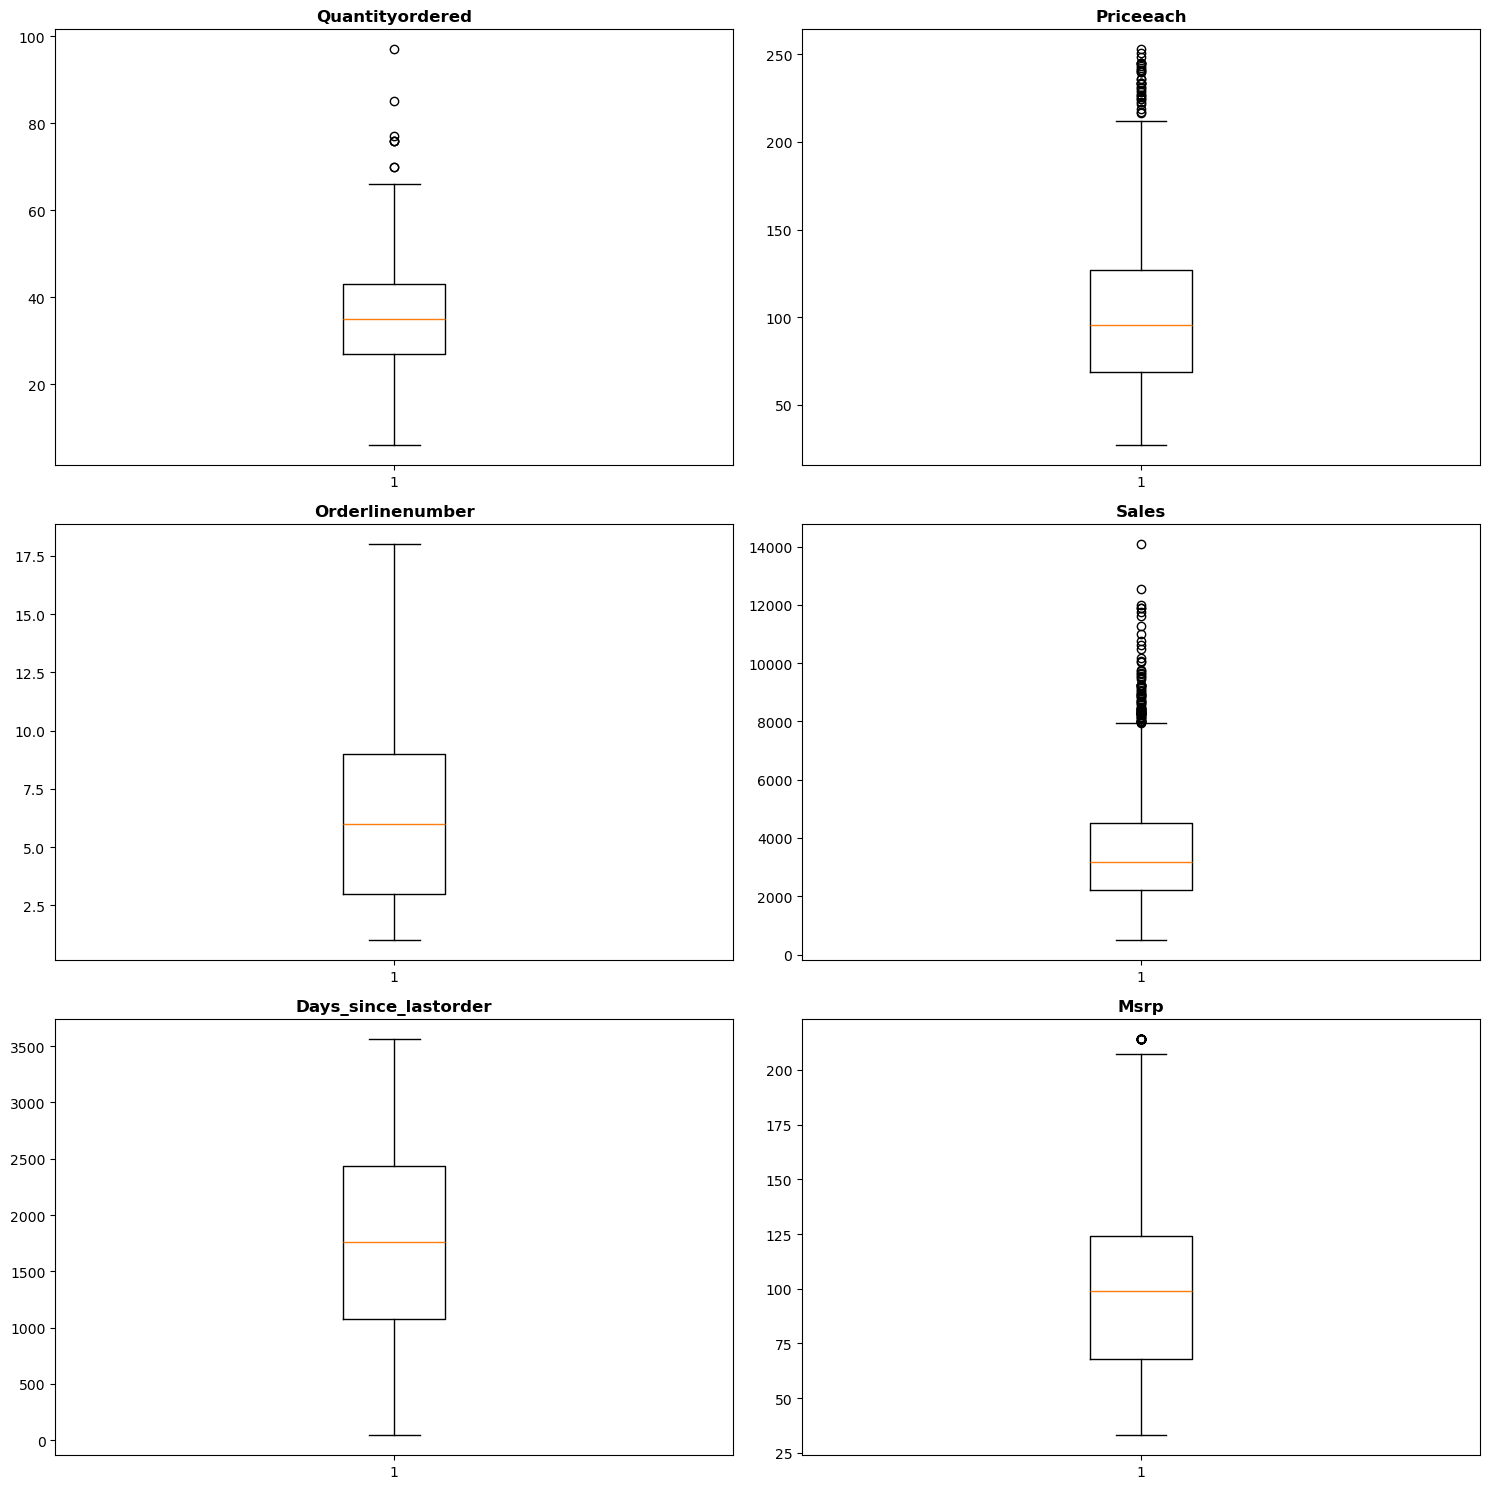

In [114]:
# Filter only numeric columns for box plot
numeric_cols = auto_hist_df.select_dtypes(include=[np.number]).columns

# Set the number of plots per row
plots_per_row = 2

# Calculate the number of rows needed
num_rows = int(np.ceil(len(numeric_cols) / plots_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create box plots for each numeric column
for i, column in enumerate(numeric_cols):
    axes[i].boxplot(auto_hist_df[column])
    axes[i].set_title(column.capitalize(), fontweight='bold')

# Hide any unused axes if the number of columns is not a perfect fit
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

* **Quantity Ordered:** The distribution is skewed to the right. Most orders are for less than 50 items. There is a sharp drop-off after 50, indicating a common order or stock quantity limit.

* **Price Each:** This histogram is also right-skewed. Most products are priced under 100 dollars, with very few above 150 dollars. This skewed distribution suggests that higher-priced items are less common or purchased in smaller volumes.

* **Order Line Number:** The multimodal distribution shows certain line items within orders occur more frequently. Frequencies decrease as line number increases, indicating orders with many items are less common.

* **Sales:** A right-skewed distribution shows a small number of orders account for high sales values, while most transactions are small or moderate.

* **Days Since Last Order:** The distribution appears uniform with a slight right skew. This might indicate that the time between orders varies widely across the dataset, with no distinct pattern of order frequency.

* **MSRP:** The right-skewed distribution indicates more products priced at the lower end of the MSRP range, with fewer high-MSRP products.

# Data Analysis

So the following lines will focus on providing three lines of analysis at country and city levels:
* Revenue breakdown by geography and product line
* Concentration Risks at the product and customer level
* Seasonality (monthly and daily)

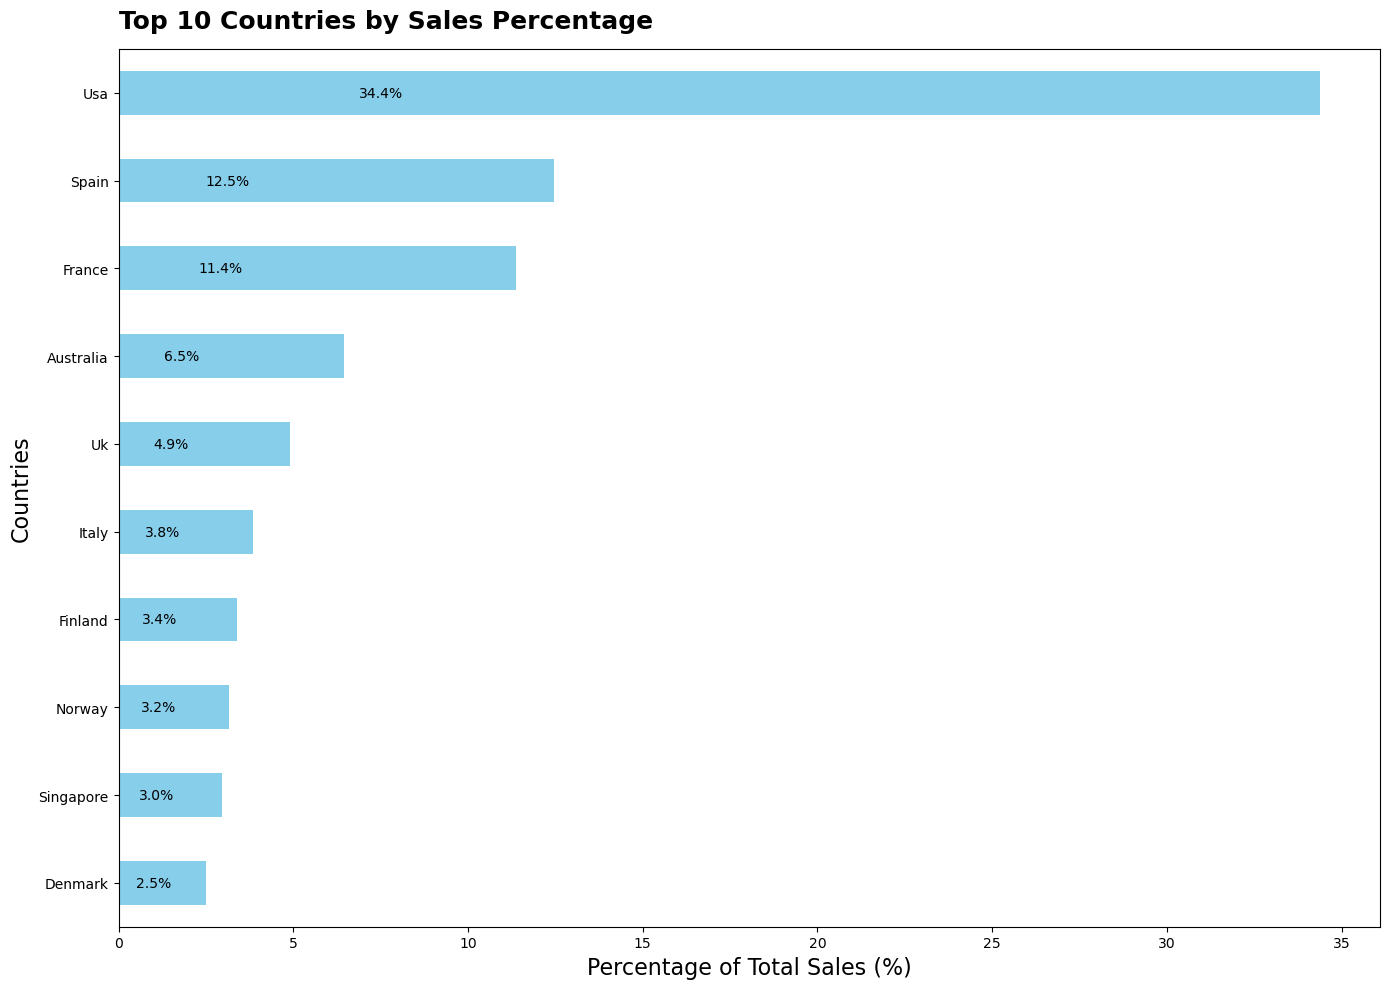

In [101]:
# Calculate total sales per country
total_sales_per_country = auto_df.groupby('country')['sales'].sum()

# Calculate each country's sales as a percentage of the total sales
sales_percentage_per_country = (total_sales_per_country / total_sales_per_country.sum()) * 100

# Sort the percentages and get the top 10 customers
top_10_country_percentage = sales_percentage_per_country.sort_values(ascending=False).head(10)

# Reverse the order for plotting
top_10_country_percentage = top_10_country_percentage[::-1]

# Plot a horizontal bar chart for the top 10 country
ax = top_10_country_percentage.plot(kind='barh', figsize=(14, 10), color='skyblue')
plt.title('Top 10 Countries by Sales Percentage', loc='left', pad=15, fontsize=18, weight='bold')
plt.xlabel('Percentage of Total Sales (%)', fontsize=16)
plt.ylabel('Countries', fontsize=16)

# Capitalize the first letter of each word in y-axis labels
ax.set_yticklabels([label.title() for label in top_10_country_percentage.index])

# Annotate each bar with the percentage value inside the bar
for p in ax.patches:
    # Place the annotation at the beginning of the bar (e.g., at 20% of the bar's width)
    ax.annotate(f"{p.get_width():.1f}%", (p.get_x() + p.get_width() * 0.2, p.get_y() + p.get_height() / 2),
                va='center', fontsize=10, color='black', rotation=0)

plt.tight_layout()  # Adjust the plot to ensure the legend and labels fit
plt.show()

With 34.4% of all sales, the USA leads, followed by France and Spain with 12.5% and 11.4%, respectively. The contributions from other nations, such as Australia, the UK, and Italy, range from 6.5% to 3.8%, while Finland, Norway, Singapore, and Denmark have the lowest percentages, 3.4% to 2.5%. There is a noticeable decline in sales percentages among the top countries, indicating that the USA is the primary focus of the market.

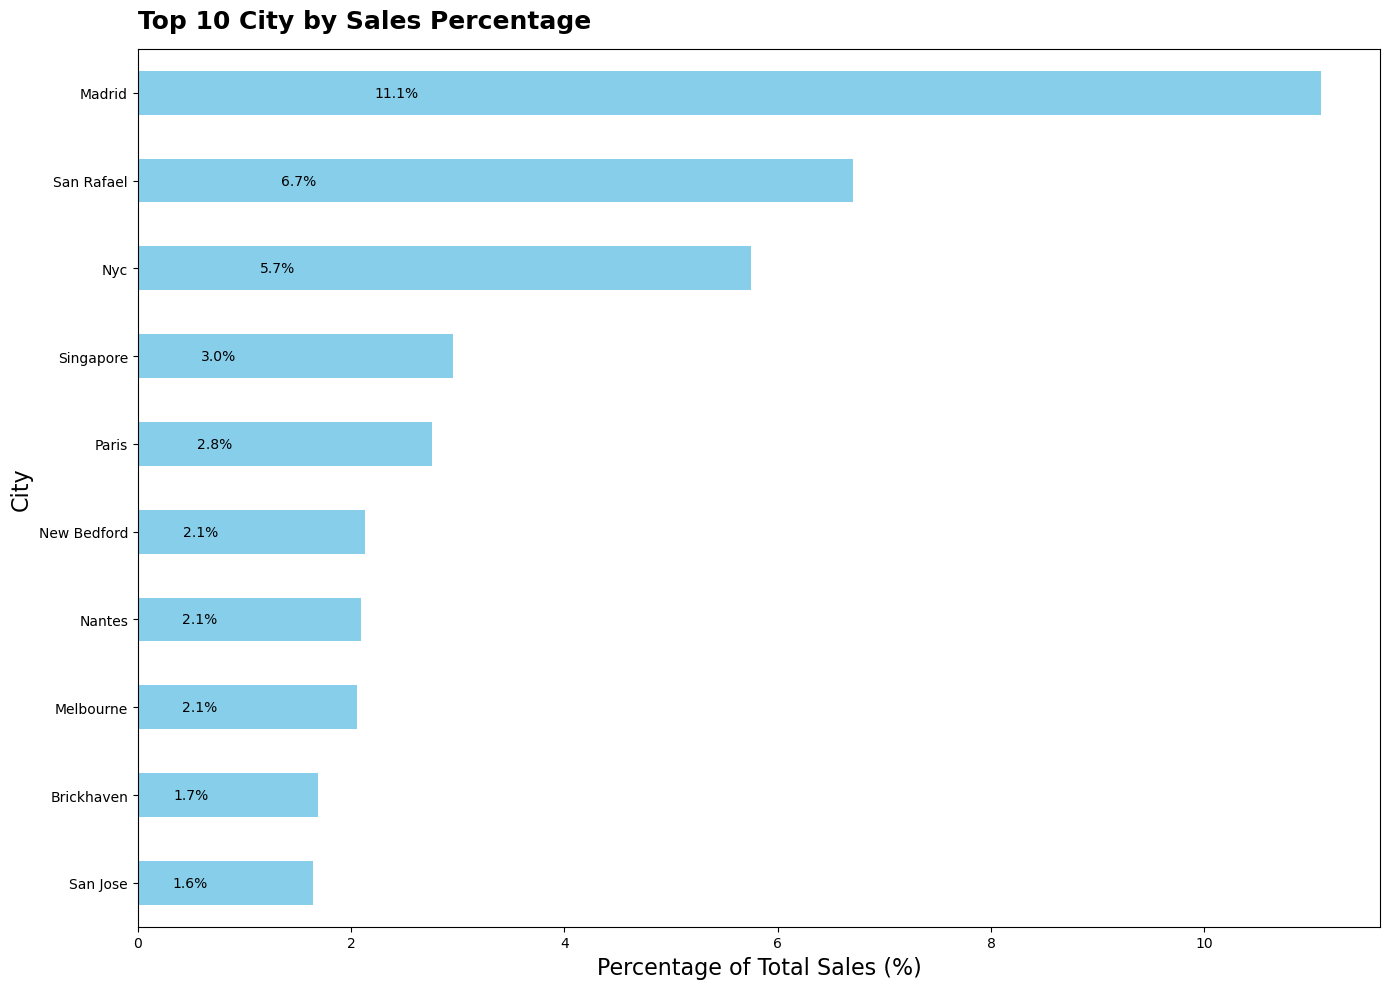

In [102]:
# Calculate total sales per city
total_sales_per_city = auto_df.groupby('city')['sales'].sum()

# Calculate each city's sales as a percentage of the total sales
sales_percentage_per_city = (total_sales_per_city / total_sales_per_city.sum()) * 100

# Sort the percentages and get the top 10 city
top_10_city_percentage = sales_percentage_per_city.sort_values(ascending=False).head(10)

# Reverse the order for plotting
top_10_city_percentage = top_10_city_percentage[::-1]

# Plot a horizontal bar chart for the top 10 city
ax = top_10_city_percentage.plot(kind='barh', figsize=(14, 10), color='skyblue')
plt.title('Top 10 City by Sales Percentage', loc='left', pad=15, fontsize=18, weight='bold')
plt.xlabel('Percentage of Total Sales (%)', fontsize=16)
plt.ylabel('City', fontsize=16)

# Capitalize the first letter of each word in y-axis labels
ax.set_yticklabels([label.title() for label in top_10_city_percentage.index])

# Capitalize the first letter of each word in y-axis labels
ax.set_yticklabels([label.title() for label in top_10_city_percentage.index])

# Annotate each bar with the percentage value inside the bar
for p in ax.patches:
    # Place the annotation at the beginning of the bar (e.g., at 20% of the bar's width)
    ax.annotate(f"{p.get_width():.1f}%", (p.get_x() + p.get_width() * 0.2, p.get_y() + p.get_height() / 2),
                va='center', fontsize=10, color='black', rotation=0)

plt.tight_layout()  # Adjust the plot to ensure the legend and labels fit
plt.show()

We are looking at the graph by city to identify which cities contain the highest percentage of our global sales for risk assessment. We should be concerned with Madrid because we see that it contains more than 80% of all of our sales in Spain which puts our Spanish market at risk if something were to happen in Madrid causing sales to drop. This means that we are at risk of losing nearly 10% of our sales.

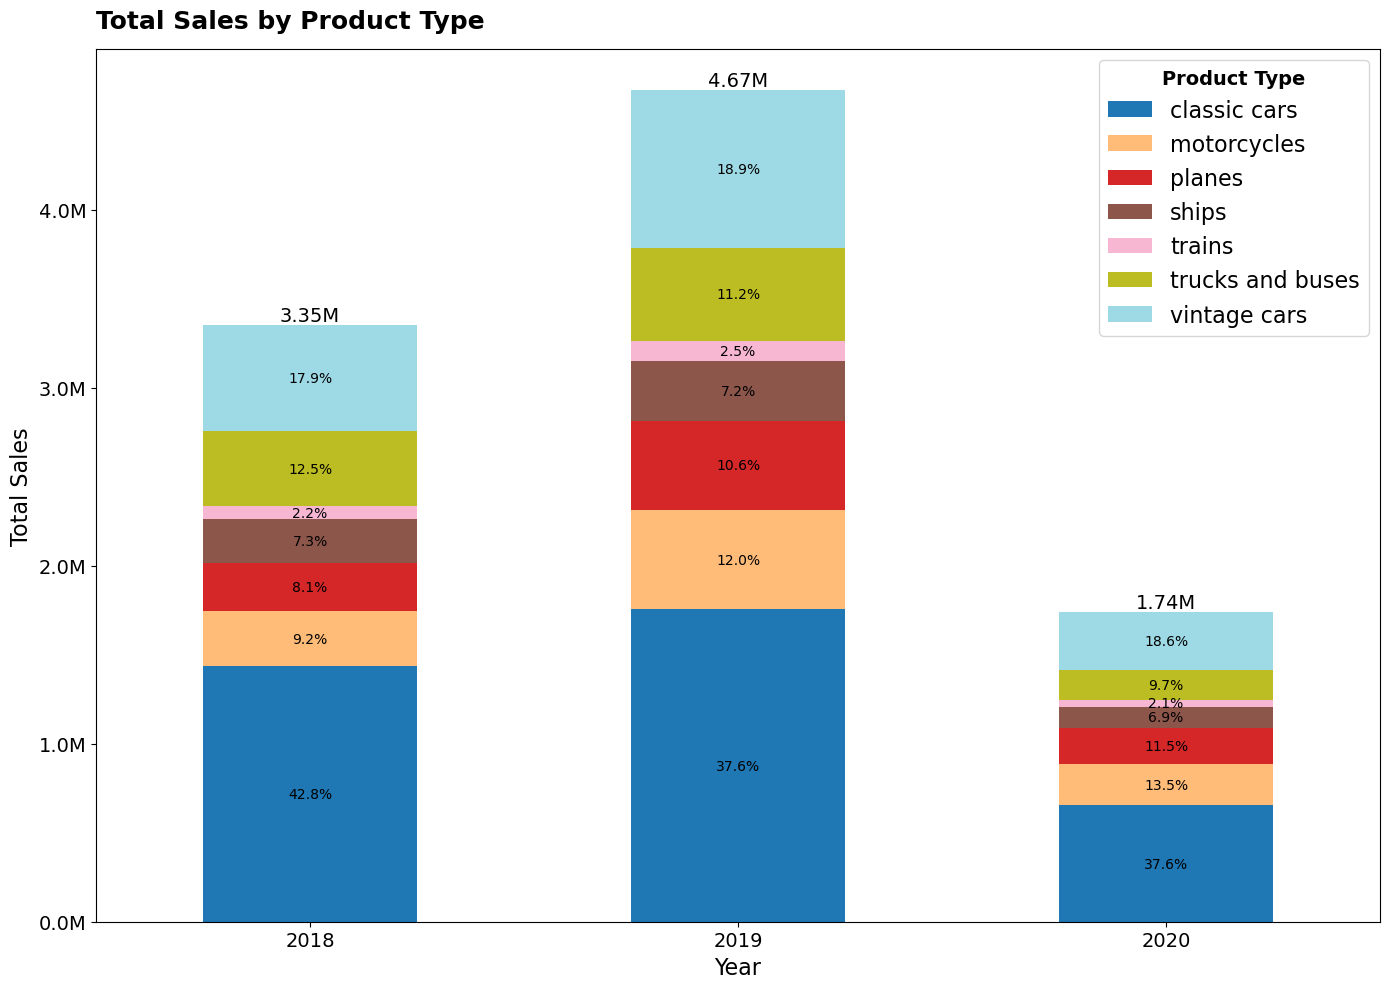

In [103]:
# Convert the order date to a datetime object
auto_df['orderdate'] = pd.to_datetime(auto_df['orderdate'], dayfirst=True)

# Extract year for grouping
auto_df['year'] = auto_df['orderdate'].dt.to_period('Y')

# Group the data by year and product type
grouped_data = auto_df.groupby(['year', 'productline']).agg({'sales': 'sum'}).reset_index()

# Pivot the data
pivot_data = grouped_data.pivot(index='year', columns='productline', values='sales').fillna(0)

# Calculate the percentage of each product type per year
percentage_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Define a function to format the Y-axis ticks in millions
def millions_formatter(x, pos):
    return f'{x/1e6}M'

# Plot the stacked bar chart with a diverse color palette
ax = pivot_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 10))

# Set the x-axis labels horizontally
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)

# Set the y-axis labels horizontally
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=14)
# Apply the millions formatter to the Y-axis
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.title('Total Sales by Product Type', loc='left', pad=15, fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.legend(title='Product Type', fontsize=14)

# Create the legend and modify its title
legend = plt.legend(title='Product Type', fontsize=16)
legend_title = legend.get_title()
legend_title.set_fontsize(14)  # Set a larger font size for the legend title
legend_title.set_weight('bold')     # Set the legend title to bold

# Adding annotations for percentages and total sales
for i, (year_index, row) in enumerate(percentage_data.iterrows()):
    total_sales = pivot_data.iloc[i].sum()  # Total sales for the year
    for j, (category, percentage) in enumerate(row.items()):
        if percentage > 0:  # Only annotate if there's a visible bar section
            
            # Calculate the y position for the annotation
            y_offset = pivot_data.iloc[i, :j].sum() + (pivot_data.iloc[i, j] / 2)
            # Annotate with the percentage
            ax.annotate(f'{percentage:.1f}%', (i, y_offset), ha='center', va='center', fontsize=10, color='black')
    
    # Annotate total sales at the top of each bar
    ax.annotate(f'{total_sales/1e6:,.2f}M', (i, total_sales), ha='center', va='bottom', fontsize=14, color='black')

# Show the plot
plt.tight_layout()
plt.show()

Sales went up from 3.35 million USD in 2018 to 4.67 million USD in 2019, then fell abruptly to 1.74 million USD in 2020. Year after year, classic automobiles and vintage cars took the lead in sales. In 2020, overall sales were down to less than half of the previous year, but the demand for products like classic and vintage cars was very consistent. A multitude of factors may account for this decrease in revenue, including economic conditions, market trends, and global occurrences such as the COVID-19 pandemic. The stability of classic and vintage cars indicates a greater capacity to withstand external disturbances in comparison to alternative products. As a result of this trend, it may be necessary for companies to modify their approaches, concentrating more on the marketing and sale of classic and vintage cars in order to maximize profits under fluctuating market conditions.

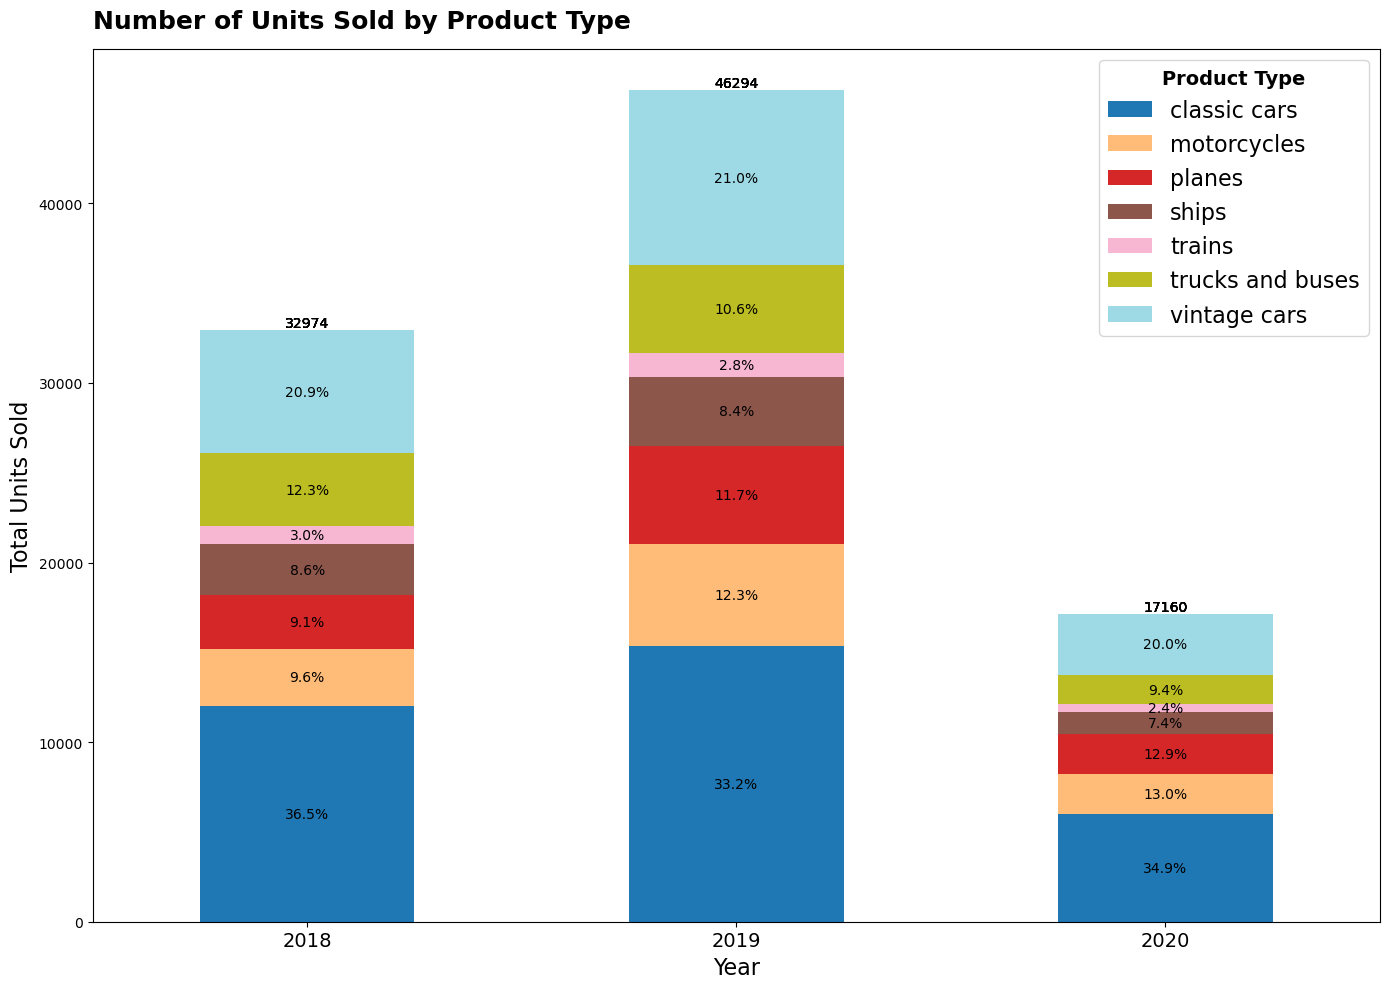

In [104]:
# Convert the order date to a datetime object
auto_df['orderdate'] = pd.to_datetime(auto_df['orderdate'], dayfirst=True)

# Extract year for grouping
auto_df['year'] = auto_df['orderdate'].dt.to_period('Y')

# Group the data by year and product type
grouped_data = auto_df.groupby(['year', 'productline']).agg({'quantityordered': 'sum'}).reset_index()

# Pivot the data
pivot_data = grouped_data.pivot(index='year', columns='productline', values='quantityordered').fillna(0)

# Calculate the percentage of each product type per year
percentage_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart with a diverse color palette
ax = pivot_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 10))

# Set the x-axis labels horizontally
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)

plt.title('Number of Units Sold by Product Type', loc='left', pad=15, fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Units Sold', fontsize=16)
plt.legend(title='Product Type', fontsize=14)

# Create the legend and modify its title
legend = plt.legend(title='Product Type', fontsize=16)
legend_title = legend.get_title()
legend_title.set_fontsize(14)  # Set a larger font size for the legend title
legend_title.set_weight('bold')     # Set the legend title to bold

# Adding annotations for percentages
for i, (year_index, row) in enumerate(percentage_data.iterrows()):
    total_units = pivot_data.iloc[i].sum()  # Calculate total units for the year
    for j, (category, percentage) in enumerate(row.items()):
        if percentage > 0:  # Only annotate if there's a visible bar section
            # Calculate the y position for the annotation
            y_offset = pivot_data.iloc[i, :j].sum() + (pivot_data.iloc[i, j] / 2)
            # Annotate with the percentage
            ax.annotate(f'{percentage:.1f}%', (i, y_offset), ha='center', va='center', fontsize=10, color='Black')
            ax.annotate(f'{total_units}', (i, total_units), ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

The number of units sold increased substantially from 32,974 units in 2018 to 46,294 units in 2019. In contrast, sales dropped precipitously in 2020, totaling 17,160 units, which was considerably lower than the 2018 figure and less than half of what was sold in 2019. Classic Cars consistently maintained their position as the best-selling product annually, accounting for the largest share of units solds. In sales, Vintage Cars consistently rated second. On the contrary, trains and airplanes consistently represented the least significant portion. Regardless the overall decline in units sold during the year 2020, the percentage of Classic Cars sold remained constant accounting for nearly 35%, compared to 36.5% in 2018 and 33.2% in 2019. Additionally, the proportion of vintage cars sold increased to 20.0% in 2020. The 2020 significant drop in total units sold indicates a market contraction or a response to external events like economic downturns or consumer behavior changes. The consistent consumer interest in classic and vintage cars is suggested by their persistent popularity, whereas the comparatively lower appeal of trains and airplanes may suggest the existence of niche markets or reduced demand.

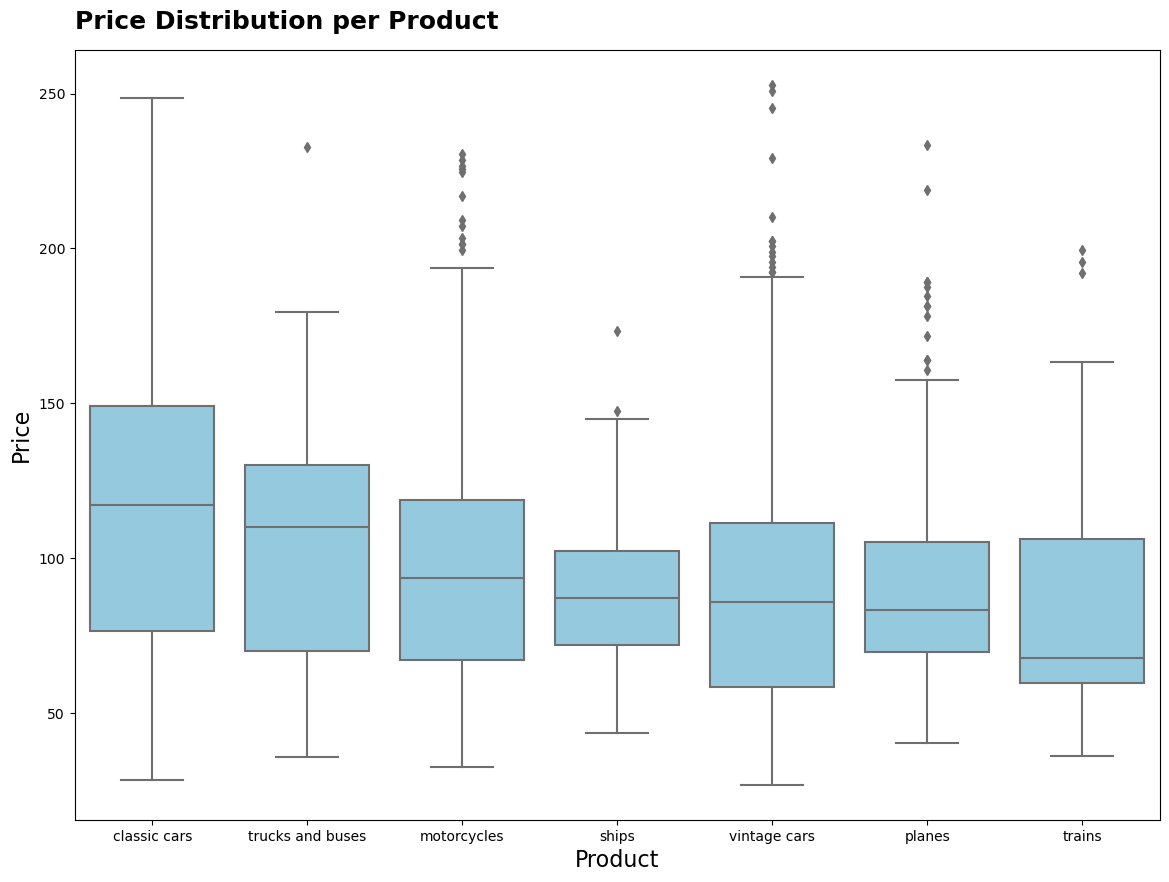

In [105]:
# Get the median price for each product line and sort in descending order
median_prices = auto_df.groupby('productline')['priceeach'].median().sort_values(ascending=False).index

# Price Distribution per Product ordered by median
plt.figure(1, figsize=(14, 10))
sns.boxplot(x='productline', y='priceeach', data=auto_df, color='skyblue', order=median_prices)
plt.title('Price Distribution per Product', loc='left', pad=15, fontsize=18, weight='bold')
plt.xlabel("Product", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.xticks(rotation=0)
plt.show()

With the largest median price and the most price fluctuation, classic cars show a broad range of value. Less price variation is shown for ships, planes, and motorcycles, indicating more consistent pricing. Outliers in the vintage automobile, aircraft, and classic car categories point to premium categories. Buses, trains, and trucks all have similar costs with a small variation. The prices of older cars are often consistent. All things considered, trains exhibit the most pricing stability, while historic vehicles have the greatest price variability. The majority of products have median pricing under $150.

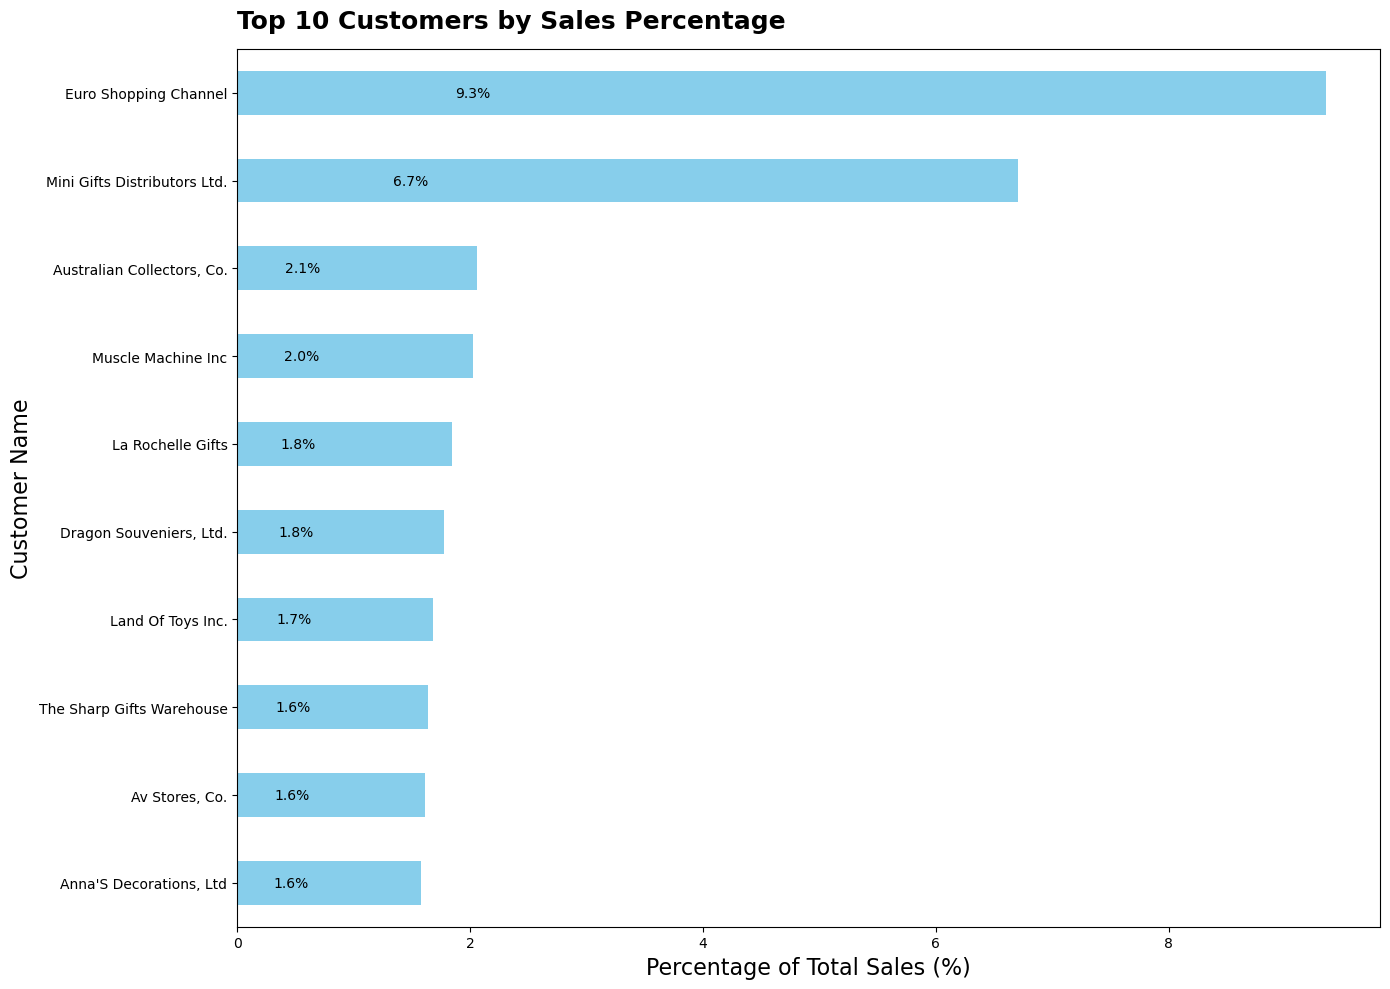

In [108]:
# Calculate total sales per customer
total_sales_per_customer = auto_df.groupby('customername')['sales'].sum()

# Calculate each customer's sales as a percentage of the total sales
sales_percentage_per_customer = (total_sales_per_customer / total_sales_per_customer.sum()) * 100

# Sort the percentages and get the top 10 customers
top_10_customers_percentage = sales_percentage_per_customer.sort_values(ascending=False).head(10)

# Reverse the order for plotting
top_10_customers_percentage = top_10_customers_percentage[::-1]

# Plot a horizontal bar chart for the top 10 customers
ax = top_10_customers_percentage.plot(kind='barh', figsize=(14, 10), color='skyblue')
plt.title('Top 10 Customers by Sales Percentage', loc='left', pad=15, fontsize=18, weight='bold')
plt.xlabel('Percentage of Total Sales (%)', fontsize=16)
plt.ylabel('Customer Name', fontsize=16)

# Capitalize the first letter of each word in y-axis labels
ax.set_yticklabels([label.title() for label in top_10_customers_percentage.index])

# Annotate each bar with the percentage value inside the bar
for p in ax.patches:
    # Place the annotation at the beginning of the bar (e.g., at 20% of the bar's width)
    ax.annotate(f"{p.get_width():.1f}%", (p.get_x() + p.get_width() * 0.2, p.get_y() + p.get_height() / 2),
                va='center', fontsize=10, color='black', rotation=0)

plt.tight_layout()  # Adjust the plot to ensure the legend and labels fit
plt.show()


Sales are concentrated, indicating a reliance on a small number of important clients. The top customer alone accounts for 9.3% of total sales, while the top two together account for 16%. A more evenly distributed sales distribution is demonstrated by the remaining top clients, who contribute 1.6% to 2.1%. Because of its reliance on its primary clients, the business runs the danger of losing money if these relationships break down. To reduce this risk, diversification and fortified ties with other important clients are necessary.

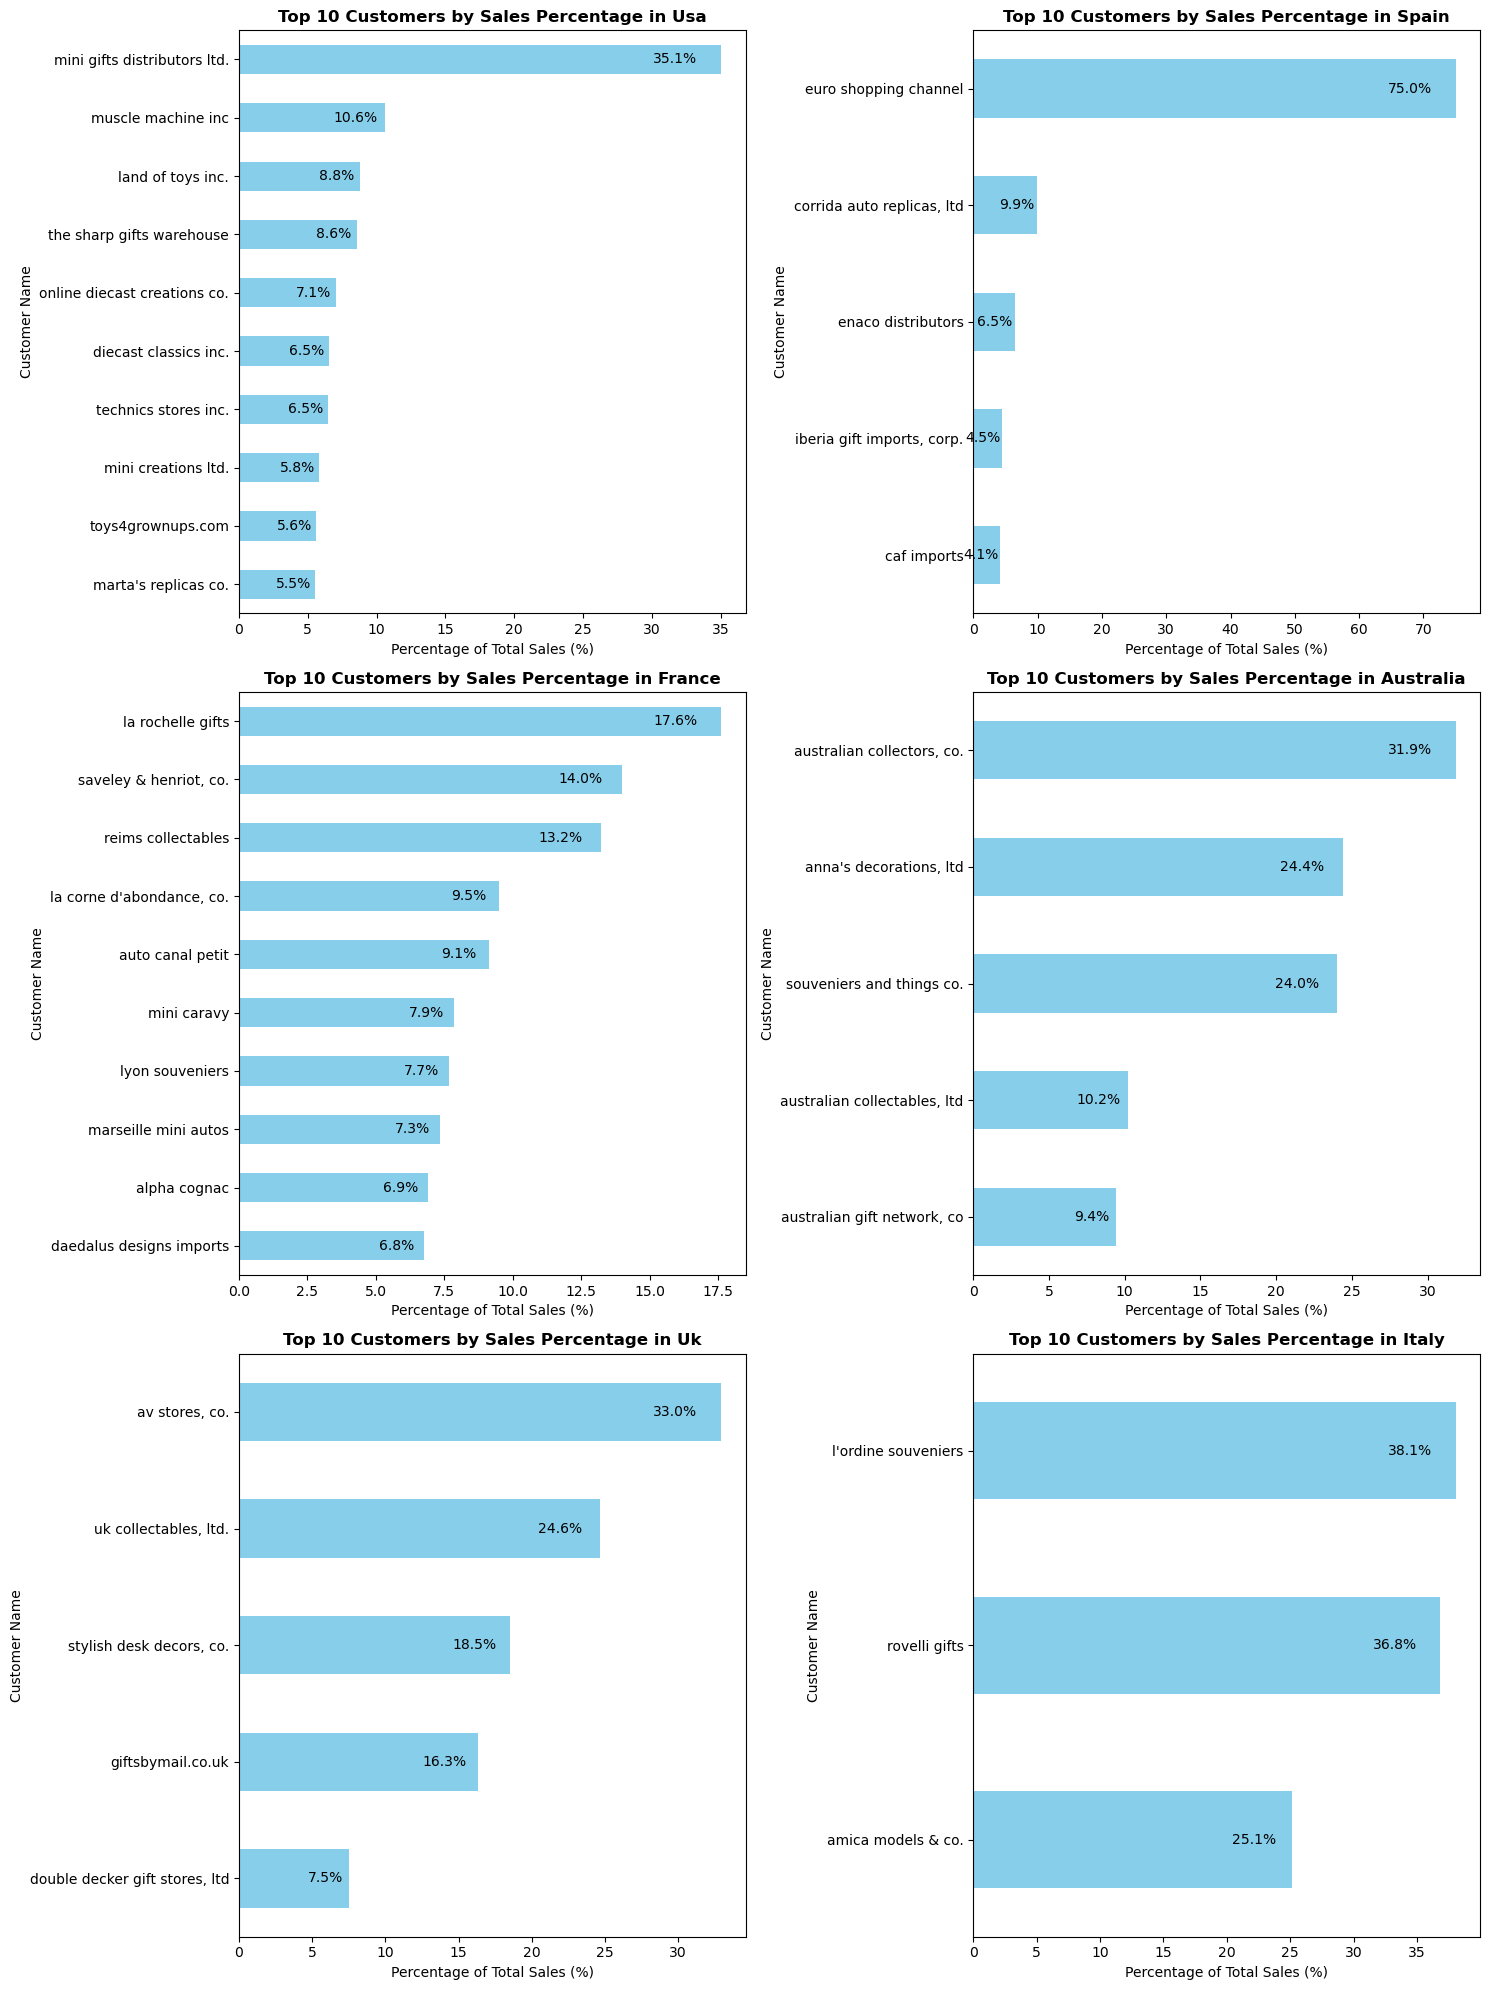

In [109]:
# Define the countries
countries = ['usa', 'spain', 'france', 'australia', 'uk', 'italy']

# Create a figure with 6 subplots (3 rows and 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, country in enumerate(countries):
    # Filter the data for sales in the current country
    country_data = auto_df[auto_df['country'].str.lower() == country]

    # Group by 'CUSTOMERNAME', sum 'SALES', and get the top 10 customers
    top_customers = country_data.groupby('customername')['sales'].sum().nlargest(10)

    # Calculate the total sales of the top 10 customers
    total_top_sales = top_customers.sum()

    # Express each customer's sales as a percentage of the total of the top 10
    top_customers_percentage = (top_customers / total_top_sales) * 100

    # Plot a horizontal bar chart in the current subplot
    top_customers_percentage.sort_values().plot(kind='barh', color='Skyblue', ax=axes[i])
    axes[i].set_title(f'Top 10 Customers by Sales Percentage in {country.capitalize()}', weight='bold')
    axes[i].set_xlabel('Percentage of Total Sales (%)')
    axes[i].set_ylabel('Customer Name')

    # Annotate each bar with the percentage value
    for bar in axes[i].patches:
        axes[i].text(bar.get_width() - (bar.get_width() * 0.05), bar.get_y() + bar.get_height() / 2,
                     f'{bar.get_width():.1f}%', va='center', ha='right', color='black', fontsize=10)

# Adjust the layout so everything fits without overlap
plt.tight_layout()

# Show the plot
plt.show()

Sales are mainly dominated by 6 countries: the USA, Spain, France, Australia, the UK, and Italy. Spain's "euro shopping channel" accounts for an extraordinary 75% of total sales. "mini gifts distributors ltd." in the USA leads the market with 35.1%, followed by "la rochelle gifts" in France with 17.6%, "australian collectors, co." in Australia with 31.9%, "av stores, co." in the UK with 33%, and "corporate souvenirs" in Italy with 38.1%. If important clients leave, there could be dangers associated with this concentration. Other markets show greater balance; however, Spain has an extraordinary customer concentration. Building trusting relationships with these clients and broadening the clientele is essential for risk reduction; because market conditions differ per nation, these approaches can be needed.

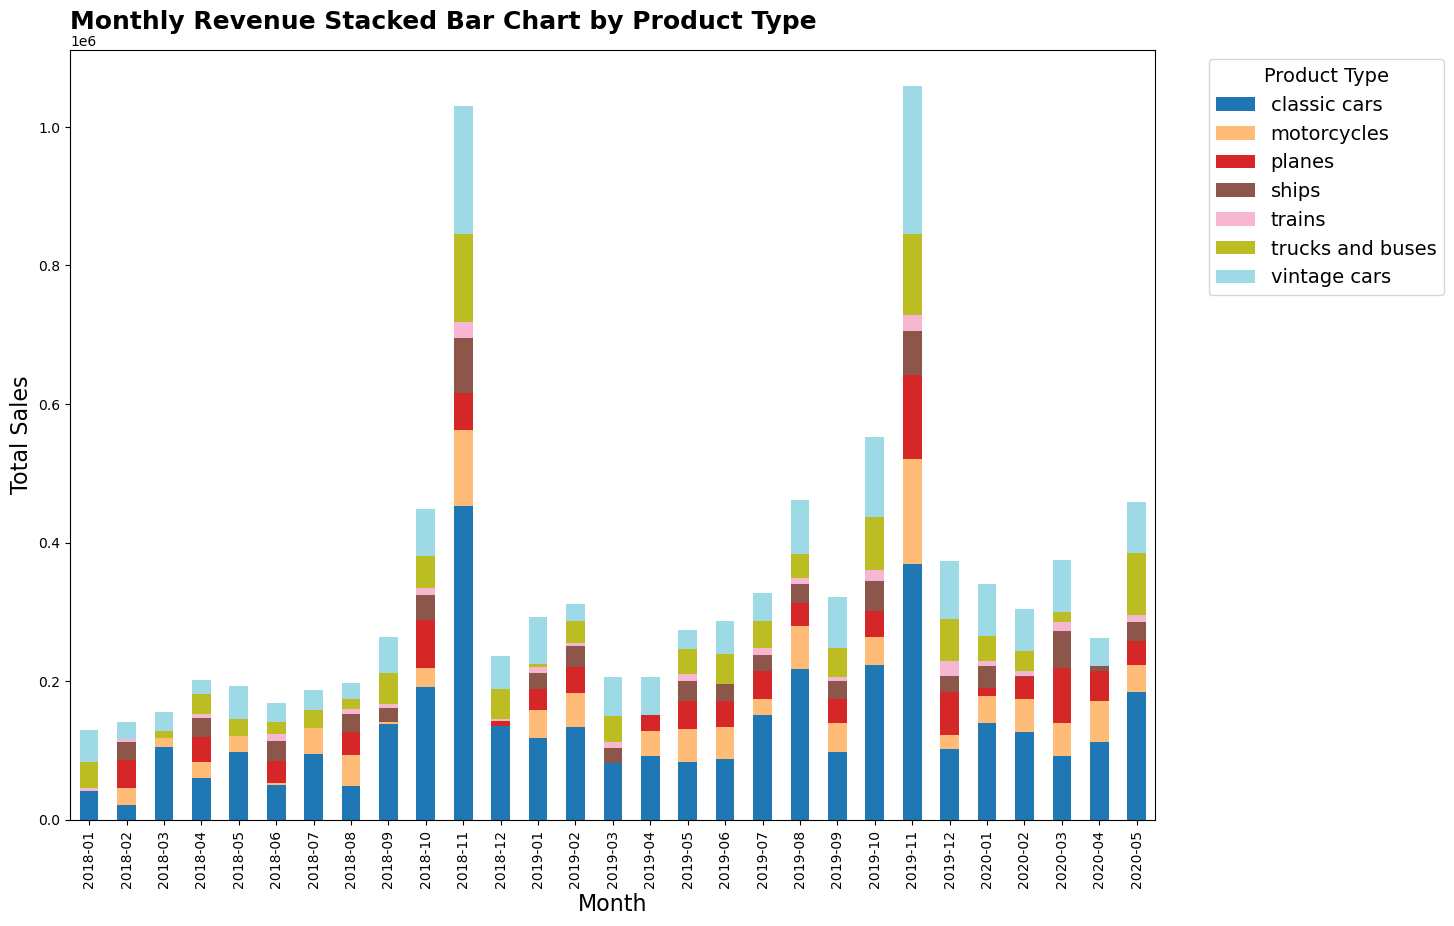

In [106]:
# Extract year and month for grouping
auto_df['year_month'] = auto_df['orderdate'].dt.to_period('M')

# Group the data by year-month and product type
grouped_data = auto_df.groupby(['year_month', 'productline']).agg({'sales': 'sum'}).reset_index()

# Pivot the data
pivot_data = grouped_data.pivot(index='year_month', columns='productline', values='sales').fillna(0)

# Plot the stacked bar chart with a diverse color palette
pivot_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 10))
plt.title('Monthly Revenue Stacked Bar Chart by Product Type', loc='left', pad=15, fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)

# Increase the font size of the legend title
plt.legend(title='Product Type', bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=14, title_fontsize=14)

plt.show()

Revenue fluctuates month to month and surges noticeably during holidays, indicating seasonality. Sales of classic cars are always in the lead, although vintage cars also contribute significantly. Early in 2020, there is a noticeable decline in revenue, which could be brought on by outside factors like the pandemic or economic downturns. Revenue in 2019 was higher than in 2018, suggesting room for expansion. The least profitable vehicles are motorbikes, trains, and airplanes, maybe as a result of lower demand or competitive price. The data suggests that strategy may need to change. For example, lower-selling lines could benefit from targeted marketing, while vintage and classic cars could perform exceptionally well.

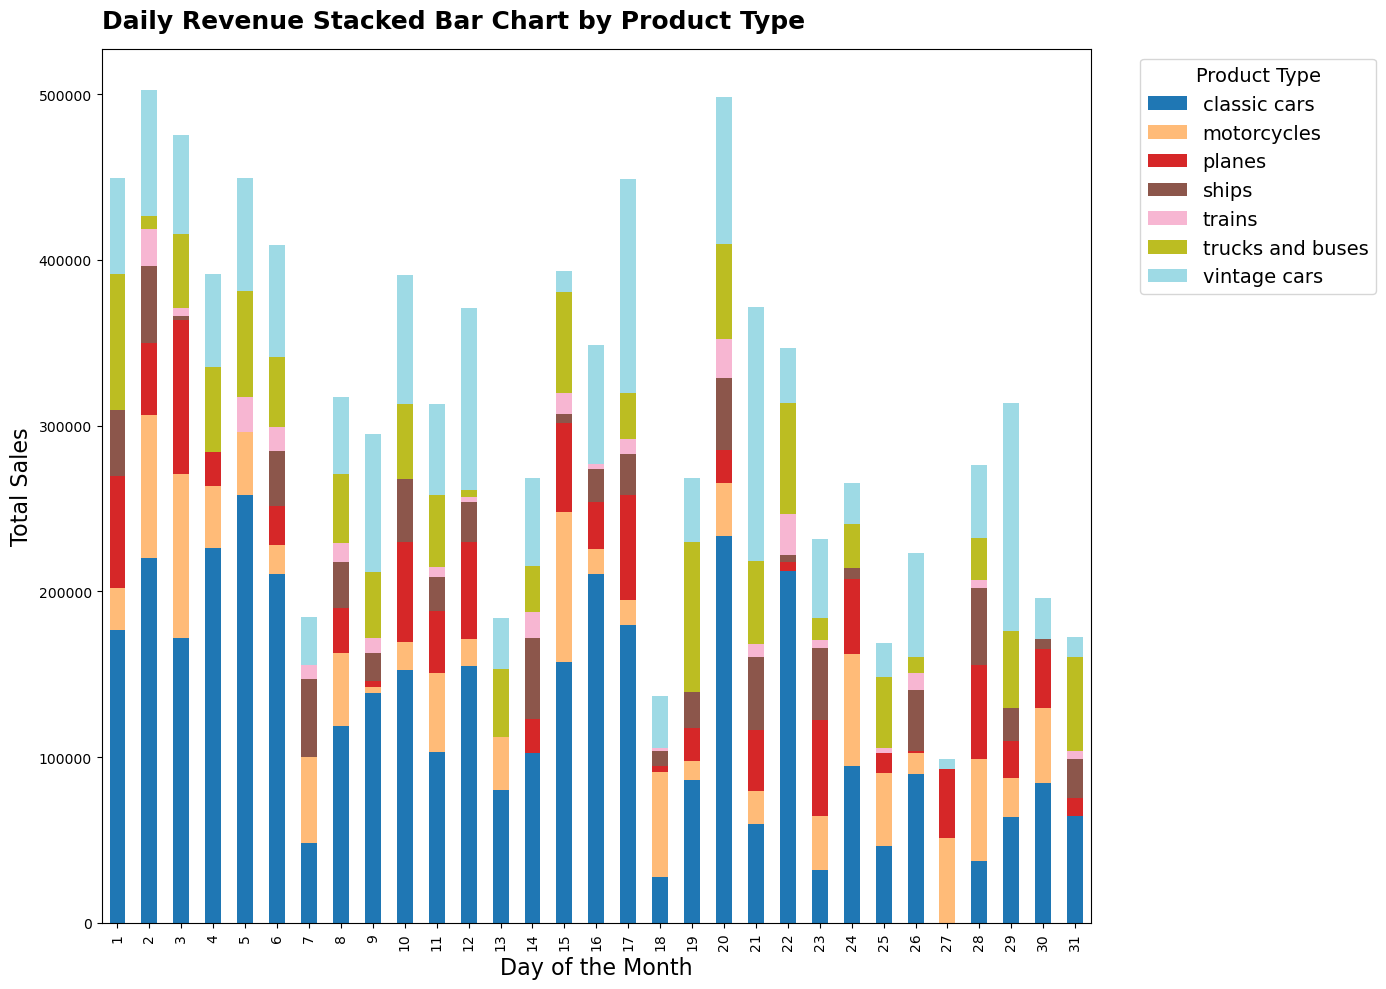

In [107]:
# Extract the day of the month for grouping
auto_df['day_of_month'] = auto_df['orderdate'].dt.day

# Group the data by day of the month and product type
grouped_data = auto_df.groupby(['day_of_month', 'productline']).agg({'sales': 'sum'}).reset_index()

# Pivot the data
pivot_data = grouped_data.pivot(index='day_of_month', columns='productline', values='sales').fillna(0)

# Plot the stacked bar chart with a diverse color palette
pivot_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 10), legend='reverse')
plt.title('Daily Revenue Stacked Bar Chart by Product Type', loc='left', pad=15, fontsize=18, weight='bold')
plt.xlabel('Day of the Month', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.legend(title='Product Type', bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14,title_fontsize=14)
plt.tight_layout()  # Adjust the plot to ensure the legend and labels fit
plt.show()

There is considerable day-to-day variation in daily sales, with classic cars consistently being top revenue drivers, followed by vintage cars. Identifiable sales patterns emerge when analyzed over the month, with certain days showing peaks across all product types, likely tied to promotions or events, while other days see universally low sales. The proportion of sales by product type remains relatively consistent, with classic and vintage cars dominating. Leveraging these observable patterns and trends in monthly consumer behavior could inform inventory management, sales forecasting, and future business strategy to optimize performance.

# Main Findings

* Even though one-third of the revenue is concentrated in the USA (34.4%), the customer concentration within the country is moderate.


* Nonetheless, there is a concentration risk in Spain, where just one customer represents 75% of the sales in Madrid; the city represents 11.1% of global sales. The sales teams should work on diversifying the portfolio with potential cities like Barcelona.


* In terms of customer concentration, most countries make up the Pareto with just 3 clients, which is risky depending on the country’s case. If the souvenir market is highly concentrated, and there are low market entry barriers, there is a business possibility for the company to integrate vertically. Otherwise, if the market is highly diversified, the sales teams should increase the client base to raise revenue and reduce risk.


* Regarding the product mix, the portfolio is very well-balanced, with a clear preference for classic cars. However, the low contribution of train models (2,1%) to the overall revenue should be evaluated concerning production costs. It also has the lowest average price per unit in every deal.


* In terms of seasonality, we see clear peaks in November, which is unsurprising due to its holidays and proximity to Christmas. The marketing and sales teams should focus on strategies for warming up clients at least 6 months before that season when the company perceives most of the year’s revenue. 


* Daily, there is a biweekly seasonality. The beginning and middle of the month’s peaks are probably due to payroll seasonalities.